In [49]:
import pandas as pd
from scipy import interpolate
import scipy
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_formats = ['png']

In [50]:
svi = pd.read_csv('SVI_Dataset.csv',header=None)
boi = pd.read_csv('BOI_Dataset.csv',header=None)
soi = pd.read_csv('SOI_Dataset.csv',header=None)

In [51]:
xnew = np.arange(-14, 125.1, 0.1)

In [52]:
fsoi = interpolate.interp1d(soi[0], soi[1])
fboi = interpolate.interp1d(boi[0], boi[1])
fsvi = interpolate.interp1d(svi[0], svi[1])

In [53]:
soi_new = fsoi(xnew)
boi_new = fboi(xnew)
svi_new = fsvi(xnew)

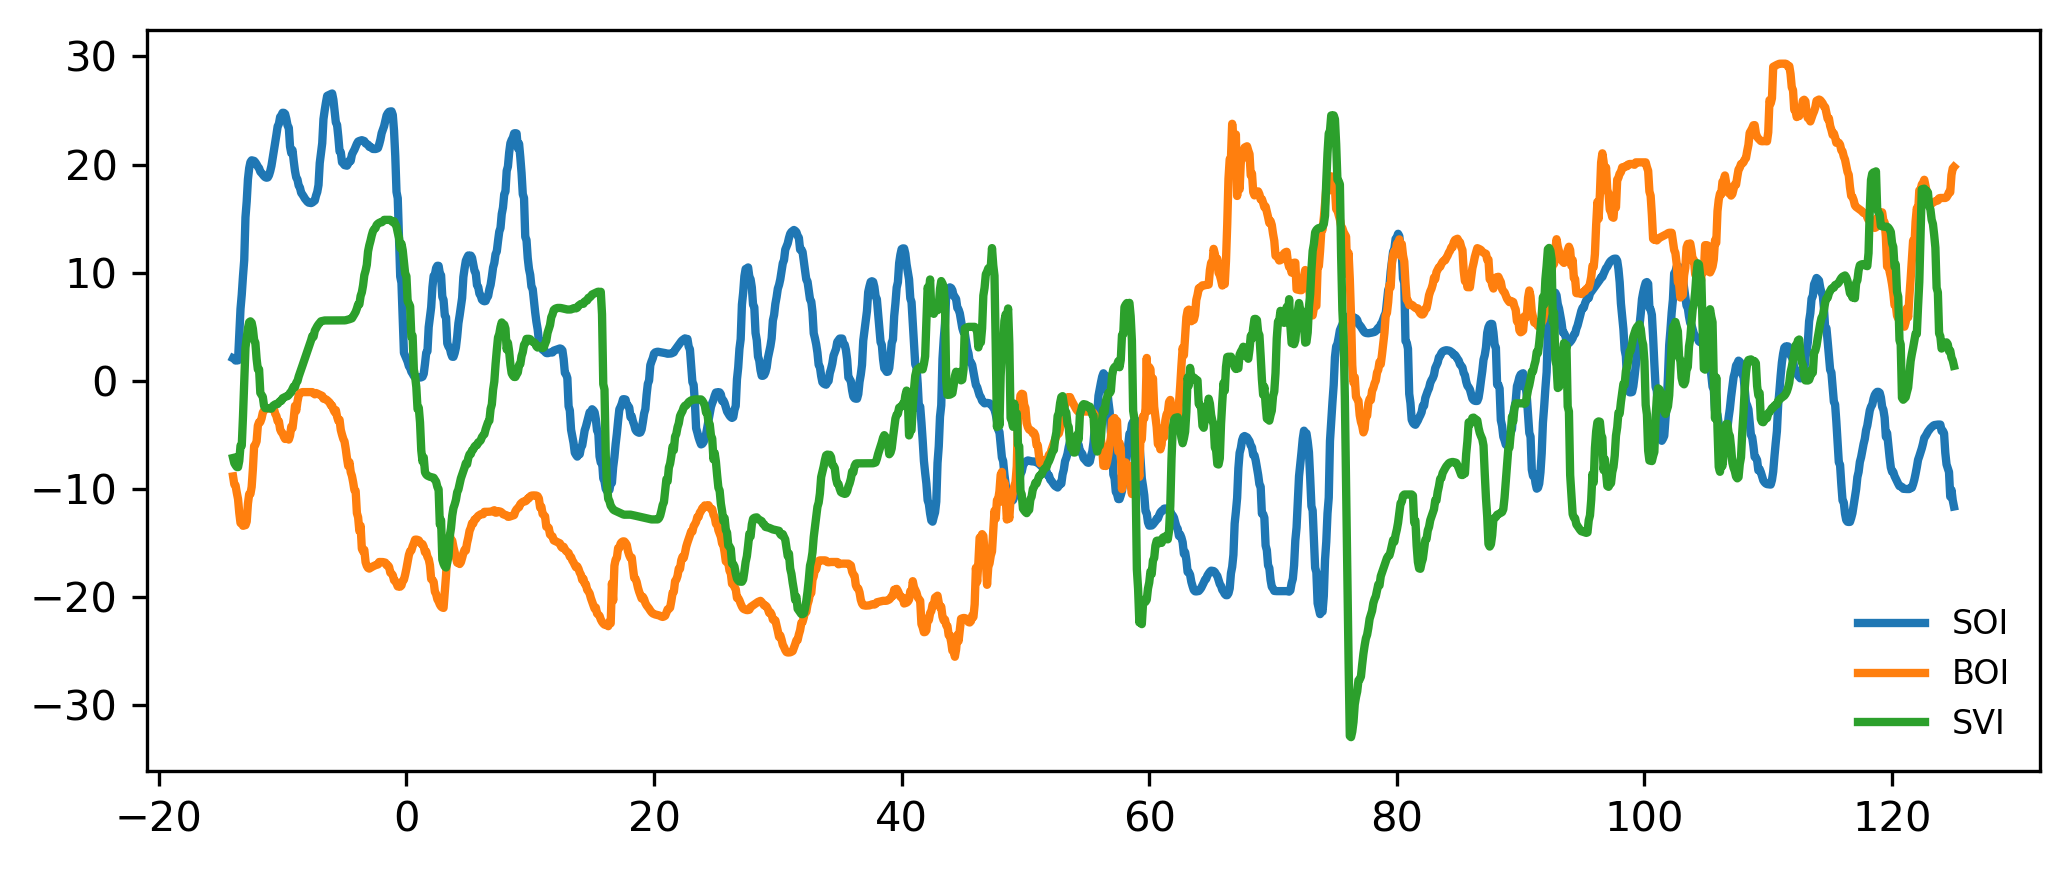

In [54]:
fig, ax1 = plt.subplots(figsize=(7, 3), dpi=300)

ax1.plot(xnew, soi_new, '-', color='tab:blue', zorder=2, lw=2, 
         label='SOI')
ax1.plot(xnew, boi_new, '-', color='tab:orange', zorder=2, lw=2, 
         label='BOI')
ax1.plot(xnew, svi_new, '-', color='tab:green', zorder=2, lw=2, 
         label='SVI')
plt.legend(frameon=False, prop={'size': 8}, loc=4)

fig.tight_layout()
plt.show()

In [55]:
svi_soi = scipy.stats.pearsonr(svi_new,soi_new) 
print('+ Pearson correlation SVI and SOI:',svi_soi[0],'pvalue',svi_soi[1])

boi_soi = scipy.stats.pearsonr(boi_new,soi_new) 
print('+ Pearson correlation BOI and SOI:',boi_soi[0],'pvalue',boi_soi[1])

+ Pearson correlation SVI and SOI: -0.021265330978198545 pvalue 0.42807457082929945
+ Pearson correlation BOI and SOI: -0.2773479458947696 pvalue 5.51980678013238e-26
